In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import astropy as ap
from astropy import units as u
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM

In [3]:
from itertools import combinations
import os
import datetime

In [4]:
cosmo=FlatLambdaCDM(H0=70,Om0=0.3)

In [5]:
catbasedir=os.environ["COSMOS_DIR"].split('Original')[0]+'/Final_Catalogs'

In [6]:
Spec_Cat=pd.read_csv(catbasedir+'/Laigle_Cat_With_kcorrections.csv')

In [50]:
Spec_Cat['final_z']

0              NaN
1         0.369500
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
            ...   
536050         NaN
536051         NaN
536052         NaN
536053    0.815000
536054         NaN
536055    0.247446
536056    1.122900
536057         NaN
536058         NaN
536059    0.566200
536060         NaN
536061    1.148000
536062    0.926736
536063    0.697800
536064    0.430000
536065         NaN
536066         NaN
536067    0.344023
536068    0.705210
536069         NaN
536070         NaN
536071    0.

In [8]:
Spec_Cat['BJ0-VJ0']=Spec_Cat.BJ0_synthetic_vega_mag-Spec_Cat.VJ0_synthetic_vega_mag

In [9]:
Spec_Cat['BJ0_synthetic_vega_absmag']=Spec_Cat['BJ0_synthetic_vega_mag']-cosmo.distmod(Spec_Cat.final_z)

/home/lrhunt/programs/anaconda3/lib/python3.7/site-packages/astropy/cosmology/core.py:1922: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(x) * hyp2f1(1./6, 1./2, 7./6, -x**3)
/home/lrhunt/programs/anaconda3/lib/python3.7/site-packages/astropy/cosmology/core.py:1447: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


In [48]:
Spec_Cat['BJ0_synthetic_vega_surface_brightness']=Spec_Cat['BJ0_synthetic_vega_absmag']+2.5*np.log10((2*np.pi*np.power(1/cosmo.arcsec_per_kpc_proper(Spec_Cat.final_z.values).value*Spec_Cat.FLUX_RADIUS.values*0.15,2)))+2.5*np.log10((360*60*60/(2*np.pi*0.01))**2)

/home/lrhunt/programs/anaconda3/lib/python3.7/site-packages/astropy/cosmology/core.py:1922: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(x) * hyp2f1(1./6, 1./2, 7./6, -x**3)
/home/lrhunt/programs/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:461: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/lrhunt/programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [49]:
Spec_Cat['BJ0_synthetic_vega_surface_brightness']

0               NaN
1         21.061044
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
            ...    
536050          NaN
536051          NaN
536052          NaN
536053    21.650249
536054          NaN
536055    23.140219
536056    20.811841
536057          NaN
536058          NaN
536059    21.346874
536060          NaN
536061    21.166509
536062    20.764247
536063    20.684103
536064    21.813080
536065          NaN
536066          NaN
536067    21.147612
536068    21.577833


In [35]:
cosmology=FlatLambdaCDM(H0=69.6,Om0=0.286)

In [46]:
print(1/cosmology.arcsec_per_kpc_proper(3))
print(cosmology.angular_diameter_distance(3).to(u.kpc)*np.tan(1*4.84814e-6))

7.8570765365186235 kpc / arcsec
7.8570817046413985 kpc


[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

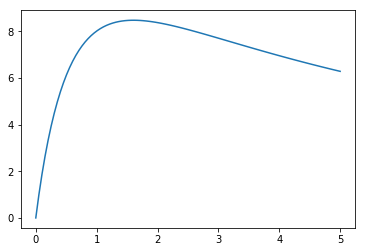

In [34]:
z_array=np.linspace(0,5,100)
print(z_array)
print(1/cosmo.arcsec_per_kpc_proper(z_array))
plt.plot(z_array,1/cosmo.arcsec_per_kpc_proper(z_array))

120.87578399999997


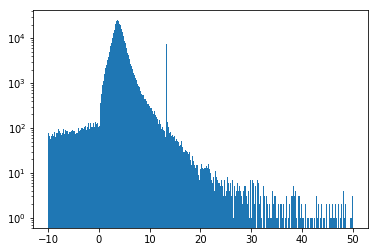

In [25]:
plt.hist(Spec_Cat.FLUX_RADIUS,bins=500,range=[-10,50],log=True)
print(max(Spec_Cat.FLUX_RADIUS)*0.15)
